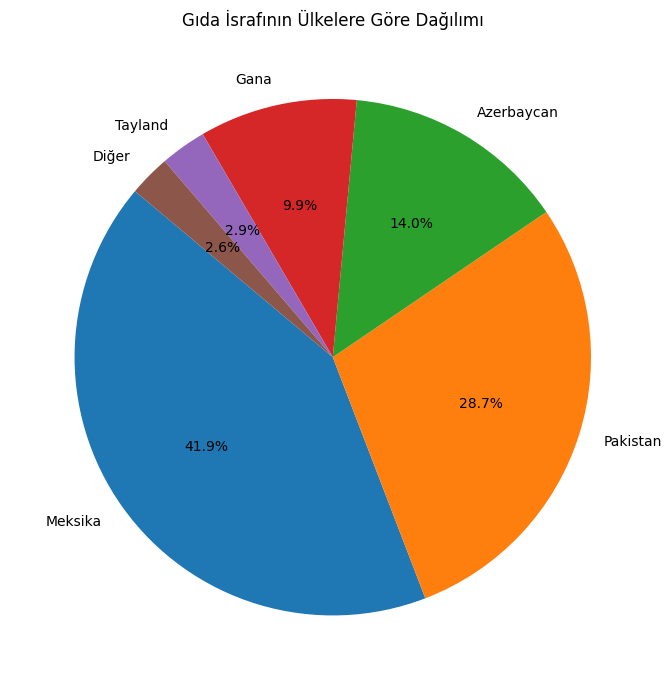

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("gidaisrafi.csv")

df["loss_quantity"] = pd.to_numeric(df["loss_quantity"], errors="coerce")

df = df.dropna(subset=["loss_quantity"])

ulke_ceviri = {
    "Mexico": "Meksika",
    "Pakistan": "Pakistan",
    "Azerbaijan": "Azerbaycan",
    "Ghana": "Gana",
    "Thailand": "Tayland"
}
df["country"] = df["country"].replace(ulke_ceviri)

toplam_israf = df.groupby("country")["loss_quantity"].sum()

en_cok_5_ulke = toplam_israf.sort_values(ascending=False).head(5)

diger = toplam_israf[~toplam_israf.index.isin(en_cok_5_ulke.index)].sum()

veri_pasta = pd.concat([en_cok_5_ulke, pd.Series({"Diğer": diger})])

plt.figure(figsize=(7, 7))
plt.pie(veri_pasta, labels=veri_pasta.index, autopct="%1.1f%%", startangle=140)
plt.title("Gıda İsrafının Ülkelere Göre Dağılımı")
plt.tight_layout()
plt.show()